In [1]:
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
df=pd.read_csv('C:/Users/devil/Desktop/thesis/diabeties/diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df=pd.read_csv('C:/Users/devil/Desktop/thesis/parkinsons (2).data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
features=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']]
labels=df.loc[:,'Outcome'].values

In [3]:
features=df.loc[:,df.columns!='status'].values[:,1:]
labels=df.loc[:,'status'].values

In [4]:
features.shape

(768, 7)

In [5]:
df.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

In [5]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

## normalization


In [6]:
norm = MinMaxScaler().fit(x_train)
X_train_norm = norm.transform(x_train)
X_test_norm = norm.transform(x_test)

In [25]:
model=XGBClassifier()
model.fit(X_train_norm,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
clf=RandomForestClassifier(n_estimators=100)

In [17]:
from sklearn import svm

In [35]:
clf2 = svm.SVC(kernel='linear')

In [15]:
clf2.fit(x_train, y_train)

SVC(kernel='linear')

In [18]:
y_pred = clf2.predict(x_test)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
classifier = KNeighborsClassifier(n_neighbors=5)


In [24]:
y_pred=classifier.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

97.43589743589743


## step forword feature selection

In [23]:
sfs=SFS(classifier,
            k_features=4,
            forward=True,
            floating=False,
            verbose=2,
            scoring='accuracy',
            cv=4,
            n_jobs=-1
       ).fit(X_train_norm,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2021-06-11 22:06:29] Features: 1/4 -- score: 0.6954099821746882[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2021-06-11 22:06:29] Features: 2/4 -- score: 0.7280791104320516[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2021-06-11 22:06:29] Features: 3/4 -- score: 0.7426788897377132[Parallel(n_jobs=-1)]: Using backend Lok

In [24]:
sfs.k_feature_names_

('1', '4', '5', '6')

In [15]:
sfs.k_feature_idx_

(0, 1, 2, 4, 5, 6)

In [13]:
sfs.k_score_

0.9294871794871795

In [51]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(21,)","[0.8717948717948718, 0.8461538461538461, 0.871...",0.852564,"(21,)",0.03408,0.0212604,0.0122747
2,"(0, 21)","[0.8974358974358975, 0.8717948717948718, 0.846...",0.878205,"(0, 21)",0.03408,0.0212604,0.0122747
3,"(0, 16, 21)","[0.9230769230769231, 0.9230769230769231, 0.897...",0.929487,"(0, 16, 21)",0.04479,0.0279417,0.0161321
4,"(0, 4, 16, 21)","[0.9230769230769231, 0.9230769230769231, 0.897...",0.929487,"(0, 4, 16, 21)",0.04479,0.0279417,0.0161321
5,"(0, 4, 5, 16, 21)","[0.9230769230769231, 0.9230769230769231, 0.923...",0.929487,"(0, 4, 5, 16, 21)",0.0177977,0.0111029,0.00641026


In [52]:
sfs=SFS(KNeighborsClassifier(n_neighbors=5,n_jobs=-1),
            k_features=(1,5),
            forward=True,
            floating=False,
            verbose=2,
            scoring='accuracy',
            cv=4,
            n_jobs=-1
       ).fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  22 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    1.3s finished

[2020-10-20 16:10:14] Features: 1/5 -- score: 0.8525641025641026[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished

[2020-10-20 16:10:14] Features: 2/5 -- score: 0.8782051282051282[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished

[2020-10-20 16:10:14] Features: 3/5 -- score: 0.9294871794871795[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  19 | 

In [53]:
sfs.k_score_

0.9294871794871795

## step backword selection

In [41]:
sfs=SFS(classifier,
            k_features=4,
            forward=False,
            floating=False,
            verbose=2,
            scoring='accuracy',
            cv=4,
            n_jobs=-1
       ).fit(X_train_norm,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2021-06-11 22:27:26] Features: 6/4 -- score: 0.7248005262711145[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2021-06-11 22:27:26] Features: 5/4 -- score: 0.7361853832442068[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2021-06-11 22:27:27] Features: 4/4 -- score: 0.7540425261013497

In [42]:
sfs.k_feature_names_

('1', '4', '5', '6')

In [43]:
sfs.k_feature_idx_

(1, 4, 5, 6)

In [58]:
sbs=sfs

In [59]:
sbs.k_score_

0.903846153846154

### EFS

In [60]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [61]:
efs=EFS(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1),
       min_features=4,
        max_features=5,
        scoring='accuracy',
        cv= None,
        n_jobs=-1
       ).fit(x_train,y_train)

Features: 31449/33649IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 33649/33649

In [62]:
efs.best_score_

1.0

In [63]:
efs.best_feature_names_

('0', '1', '2', '3')

In [64]:
efs.best_idx_

(0, 1, 2, 3)

In [65]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

D:\Users\devil\anaconda3\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\Users\devil\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x19161d79790>)

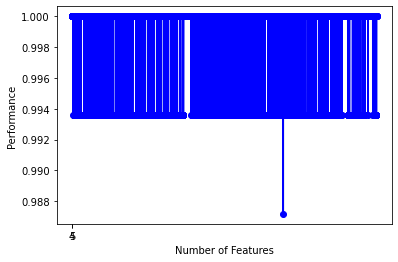

In [66]:
plot_sfs(efs.get_metric_dict(),kind='std_dev')